In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Round 2

In [6]:
#Show the dataframe shape.
data.shape

(10910, 25)

In [7]:
#Standardize header names.
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [8]:
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols  

In [9]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [10]:
# Which columns are numerical?

In [11]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [12]:
data.select_dtypes(np.number)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [13]:
data.select_dtypes(include=np.number).columns.tolist()

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [14]:
# Which columns are categorical?

In [15]:
data.select_dtypes(object)

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [16]:
data.select_dtypes(include=np.object).columns.tolist()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_21800\538813316.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes(include=np.object).columns.tolist()


['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [17]:
# Check and deal with NaN values.

In [18]:
data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [19]:
# I will drop duplicates first

In [20]:
print(data.duplicated().sum())

37


In [21]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.shape

(10873, 25)

In [22]:
data.isna().sum()

customer                            0
state                             614
customer lifetime value             0
response                          614
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [23]:
# check the values of state column

In [24]:
data['state'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

In [25]:
data['state'].value_counts(dropna=False)

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
NaN            614
Name: state, dtype: int64

In [26]:
# will change NaN to Calirforna as its by far highest value and will probably / hopefully not change the outcome too much

In [27]:
data['state'] = data['state'].fillna('California')

In [28]:
data['state'].value_counts(dropna=False)

California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

In [29]:
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                          614
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [30]:
#checking NaN in vehicle type, vehicle class,vehicle size 
data['vehicle type'].value_counts(dropna=False)

NaN    5465
A      5408
Name: vehicle type, dtype: int64

In [31]:
data['vehicle class'].value_counts(dropna=False)

Four-Door Car    5200
Two-Door Car     2112
SUV              2009
NaN               608
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [32]:
data['vehicle size'].value_counts(dropna=False)

Medsize    7233
Small      1962
Large      1070
NaN         608
Name: vehicle size, dtype: int64

In [33]:
# will drop vehicle type as I don't know what it is for and does not look important. 
# will change Nan in vehicle class & size to the mode as both modes have a very high number

In [34]:
data = data.drop(['vehicle type'], axis=1)
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [35]:
data['vehicle class'] = data['vehicle class'].fillna('Four-Door Car')

In [36]:
data['vehicle size'] = data['vehicle size'].fillna('Medsize')

In [37]:
data.isna().sum()

customer                           0
state                              0
customer lifetime value            0
response                         614
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim          623
months since policy inception      0
number of open complaints        623
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                      0
vehicle size                       0
dtype: int64

In [38]:
data['number of open complaints'].value_counts(dropna=False)

0.0    8141
1.0    1141
NaN     623
2.0     414
3.0     321
4.0     166
5.0      67
Name: number of open complaints, dtype: int64

In [39]:
data['months since last claim'].value_counts(dropna=False)

NaN     623
3.0     426
6.0     394
1.0     386
7.0     377
4.0     372
2.0     365
5.0     354
0.0     353
10.0    345
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    306
17.0    298
14.0    297
19.0    275
9.0     275
23.0    273
25.0    269
21.0    267
18.0    257
20.0    254
22.0    245
24.0    236
29.0    233
28.0    225
31.0    219
26.0    211
27.0    207
30.0    201
34.0    199
33.0    198
35.0    156
32.0    155
Name: months since last claim, dtype: int64

In [40]:
data['response'].value_counts(dropna=False)

No     8795
Yes    1464
NaN     614
Name: response, dtype: int64

In [41]:
# for NaN in response and number of complaints I will again choose the mode for the same reasons as before

In [42]:
data['response'] = data['response'].fillna('No')

In [43]:
data['number of open complaints'] = data['response'].fillna('0.0')

In [44]:
#for NaN in 'Months since last claim' I will replace them with the median. The dataset has a big range so I believe going with the median will be the best choice

In [45]:
median_months = data['months since last claim'].median()
data['months since last claim'] = data['months since last claim'].fillna(median_months)

In [46]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [47]:
# Datetime format 

In [48]:
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,No,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,No,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,No,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,Yes,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,14.0,31,No,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,14.0,40,No,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10869,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,No,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10870,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,No,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10871,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,No,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [49]:
data['effective to date'] = pd.to_datetime(data['effective to date'])

In [50]:
data['month'] = pd.to_datetime(data['effective to date']).dt.month

In [51]:
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,No,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,No,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,No,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,Yes,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,14.0,31,No,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,14.0,40,No,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10869,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,No,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10870,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,No,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10871,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,No,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [52]:
#rearraning the headers so "month" is next to original date

In [53]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'month'],
      dtype='object')

In [54]:
data = data[['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'month', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size']]

data

,customer,state,customer lifetime value,response,coverage,education,effective to date,month,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,2,Employed,M,48029,Suburban,Married,61,7.0,52,No,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,1,Unemployed,F,0,Suburban,Single,64,3.0,26,No,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,2,Employed,M,22139,Suburban,Single,100,34.0,31,No,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,1,Employed,M,49078,Suburban,Single,97,10.0,3,Yes,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,1,Medical Leave,F,23675,Suburban,Married,117,14.0,31,No,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,1,Unemployed,F,0,Suburban,Married,253,14.0,40,No,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10869,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,1,Employed,F,61146,Urban,Married,65,7.0,68,No,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10870,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,2,Employed,F,39837,Rural,Married,201,11.0,63,No,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10871,WA60547,California,11971.977650,No,Premium,College,2011-02-13,2,Employed,F,64195,Urban,Divorced,158,0.0,27,No,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [55]:
# filter the data to show only the information for the first quarter

In [56]:
data['month'].unique()

array([2, 1], dtype=int64)

In [57]:
data[(data['month']<4)]

,customer,state,customer lifetime value,response,coverage,education,effective to date,month,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,2,Employed,M,48029,Suburban,Married,61,7.0,52,No,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,1,Unemployed,F,0,Suburban,Single,64,3.0,26,No,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,2,Employed,M,22139,Suburban,Single,100,34.0,31,No,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,1,Employed,M,49078,Suburban,Single,97,10.0,3,Yes,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,1,Medical Leave,F,23675,Suburban,Married,117,14.0,31,No,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,1,Unemployed,F,0,Suburban,Married,253,14.0,40,No,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10869,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,1,Employed,F,61146,Urban,Married,65,7.0,68,No,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10870,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,2,Employed,F,39837,Rural,Married,201,11.0,63,No,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10871,WA60547,California,11971.977650,No,Premium,College,2011-02-13,2,Employed,F,64195,Urban,Divorced,158,0.0,27,No,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


# Round 3

In [58]:
#Show DataFrame info.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10873 non-null  object        
 1   state                          10873 non-null  object        
 2   customer lifetime value        10873 non-null  float64       
 3   response                       10873 non-null  object        
 4   coverage                       10873 non-null  object        
 5   education                      10873 non-null  object        
 6   effective to date              10873 non-null  datetime64[ns]
 7   month                          10873 non-null  int64         
 8   employmentstatus               10873 non-null  object        
 9   gender                         10873 non-null  object        
 10  income                         10873 non-null  int64         
 11  location code  

In [60]:
#Describe DataFrame.

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10873.0,8016.881720,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.381190
month,10873.0,1.466661,0.498910,1.000000,1.000000,1.000000,2.000000,2.000000
income,10873.0,37537.101444,30362.078350,0.000000,0.000000,33811.000000,62262.000000,99981.000000
monthly premium auto,10873.0,93.216684,34.454801,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10873.0,15.079463,9.789475,0.000000,7.000000,14.000000,23.000000,35.000000
months since policy inception,10873.0,48.098777,27.929932,0.000000,24.000000,48.000000,71.000000,99.000000
number of policies,10873.0,2.977467,2.397752,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10873.0,434.902879,292.233402,0.099007,271.014511,383.363758,547.200000,2893.239678


In [62]:
data.describe(include=[np.object]).T

C:\Users\jasmi\AppData\Local\Temp\ipykernel_21800\9414863.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object]).T


,count,unique,top,freq
customer,10873,9134,DQ50258,5
state,10873,5,California,4162
response,10873,2,No,9409
coverage,10873,3,Basic,6635
education,10873,5,Bachelor,3259
employmentstatus,10873,5,Employed,6764
gender,10873,2,F,5554
location code,10873,3,Suburban,6879
marital status,10873,3,Married,6298
number of open complaints,10873,2,No,9409


In [63]:
#Show a plot of the total number of responses

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [65]:
# picked bar chart as there are only two values to compare

<AxesSubplot:xlabel='response', ylabel='count'>

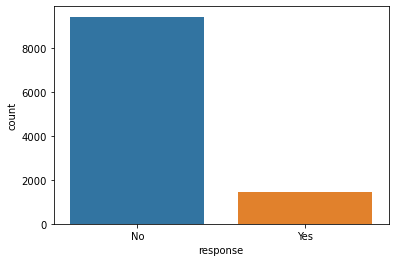

In [66]:
sns.countplot(x=data['response'])

In [67]:
#Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='count', ylabel='sales channel'>

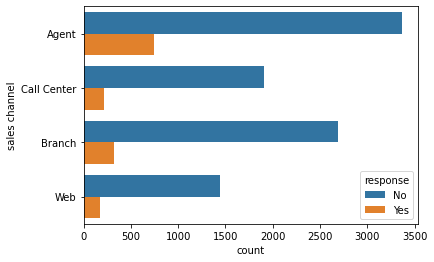

In [68]:
sns.countplot(data=data, y='sales channel', hue='response')

<AxesSubplot:xlabel='sales channel', ylabel='Count'>

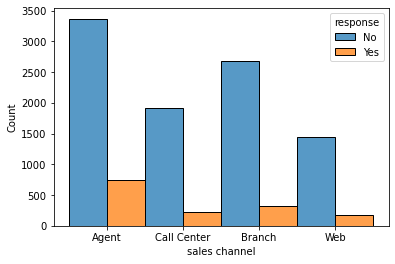

In [69]:
sns.histplot(binwidth=100,
            x='sales channel',
            hue='response',
            data=data,
            stat="count",
            multiple="dodge")

In [70]:
data['response'].value_counts()

No     9409
Yes    1464
Name: response, dtype: int64

In [71]:
data1 = (data["response"].value_counts(normalize=True).mul(100))
data1

No     86.535455
Yes    13.464545
Name: response, dtype: float64

In [72]:
#Show a plot of the response rate by the total claim amount.

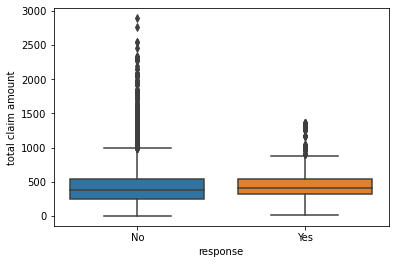

In [73]:
sns.boxplot(x = 'response',y='total claim amount', data=data)
plt.show()

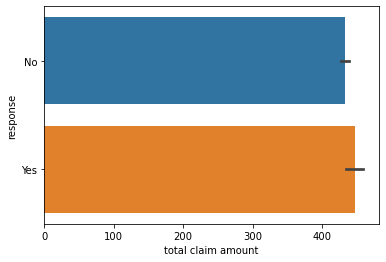

In [74]:
sns.barplot(x="total claim amount", y="response", data=data)
plt.show()

<AxesSubplot:xlabel='total claim amount', ylabel='Count'>

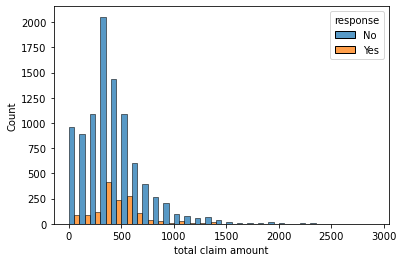

In [75]:
sns.histplot(binwidth=100,
            x='total claim amount',
            hue='response',
            data=data,
            stat="count",
            multiple="dodge")

In [76]:
#Show a plot of the response rate by income.

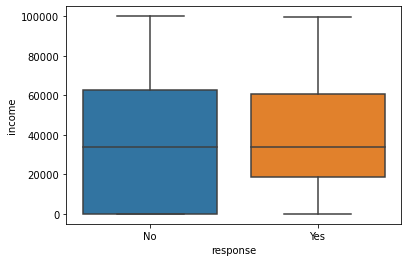

In [77]:
sns.boxplot(x = 'response',y='income', data=data)
plt.show()

<AxesSubplot:xlabel='total claim amount', ylabel='Count'>

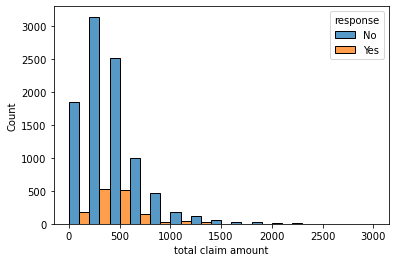

In [78]:
sns.histplot(binwidth=200,
            x='total claim amount',
            hue='response',
            data=data,
            stat="count",
            multiple="dodge")